In [3]:
from sklearn import linear_model

In [23]:
# read in the data
# we will go over these blocks of code
# in a few weeks
raw_housing_prices = open('movie-profits.txt','r').readlines()

# extract column names and create
# a list of lists for the data
# and a dictionary of lists for the data
header = raw_housing_prices[0].strip().split('\t')
housing_prices_list = []
housing_prices_dict = {}
movie_titles = []

# index of column to ignor
ind = 1 #second column
for line in raw_housing_prices[1:]:
    datum = []

    for i,a in enumerate(line.strip().split('\t')):
        if i != ind: # if not i == ind:
            datum.append(float(a))
        else:
            movie_titles.append(a)
    #datum = [float(a) for a in line.split('\t')]
    housing_prices_list.append(datum)
    for i,a in enumerate(header):
        if i == ind:
            pass
        
        if i > ind:
            i = i-1
        if a not in housing_prices_dict:
            housing_prices_dict[a] = []
        housing_prices_dict[a].append(datum[i])
        
movie_profits_list = housing_prices_list
movie_profits_dict = housing_prices_dict
del header[ind]
print header

['Year', 'US Gross ($M)', 'Budget ($M)', 'Run Time (min)', 'Critic Score (Rotten Tomatoes)']


coefficient [[ 0.11929052]]
intercept [ 99.94285837]


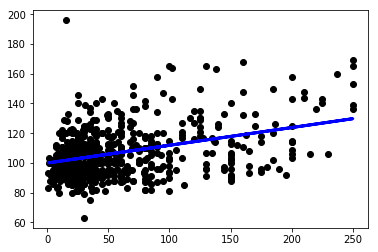

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

movie_profits_np = np.array(movie_profits_list)

movies_X = movie_profits_np[:, np.newaxis, 2]
movies_Y = movie_profits_np[:, np.newaxis, 3]



# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(movies_X, movies_Y)
print "coefficient",regr.coef_
print "intercept", regr.intercept_

movies_Y_pred = regr.predict(movies_X)

# Plot outputs
plt.scatter(movies_X, movies_Y,  color='black')
plt.plot(movies_X, movies_Y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()


[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

  146.  212.]
('Coefficients: \n', array([ 938.23786125]))
Intercept:  152.918861826
Mean squared error: 2548.07
Variance score: 0.47


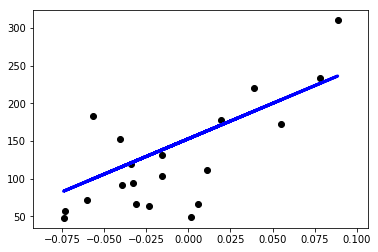

In [1]:
# example linear regression
# example taken from scikit learn website
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
print diabetes_X_train
print diabetes_y_train
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

our_predictions = regr.predict([[.5]])

# The coefficients
print('Coefficients: \n', regr.coef_)
print 'Intercept: ',regr.intercept_
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()



In [ ]:
# Let us apply it to our movie example.

